# **Data Cleaning**

## Objectives

* Remove invalid data.
* Check for missing data.

## Inputs

* Output file from DataCollection notebook: "outputs/datasets/collection/HousePrices.csv"

## Outputs

* Generated test and train data set files:
    - Test data set: "outputs/datasets/cleaned/TestSetCleaned.csv"
    - Train data set: "outputs/datasets/cleaned/TrainSetCleaned.csv"

## Additional Comments


* Install basic requirements

In [1]:
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 15.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 95.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 114.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 112.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory 
* We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2/jupyter_notebooks'

* We want to make the parent of the current directory the new current directory
  - os.path.dirname() gets the parent directory
  - os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


* Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2'

---

# Load collected data

* In this section we set the dataframe with the first view on the data.
  - We will install pandas.
  - Restart kernel.
  - We import pandas.

In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


Restart kernel.

In [1]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HousePrices.csv")
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data exploration

* As a first step we need to check which data variables contains missing values.
  - Run check to find varibles with missing data.

In [2]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

* In the first step, we detected ten different variables. Below, we explore the details, including the data type and the proportion of missing data for each variable.

In [3]:
df[vars_with_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtExposure   1422 non-null   object 
 3   BsmtFinType1   1315 non-null   object 
 4   EnclosedPorch  136 non-null    float64
 5   GarageFinish   1225 non-null   object 
 6   GarageYrBlt    1379 non-null   float64
 7   LotFrontage    1201 non-null   float64
 8   MasVnrArea     1452 non-null   float64
 9   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(3)
memory usage: 114.2+ KB


* In the final step of the first section of our investigation into missing data variables, we will explore the distribution of values by generating a profile report.

In [4]:
# Code from walkthrough project 02, data cleaning notebook
from ydata_profiling import ProfileReport
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* For readability, the table below displays the proportion of missing data for each variable. Although this information is also available in the profile report, the table provides an easy overview.

In [5]:
def EvaluateMissingData(df):
  """
  Function to evaluate data with missing values
  """
  missing_data_absolute = df.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df)*100 , 2)
  df_missing_data = (pd.DataFrame(
                          data= {"RowsWithMissingData": missing_data_absolute,
                                 "PercentageOfDataset": missing_data_percentage,
                                 "DataType":df.dtypes}
                                  )
                    .sort_values(by=['PercentageOfDataset'],ascending=False)
                    .query("PercentageOfDataset > 0")
                    )

  return df_missing_data

In [6]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


### Summary - detailed study of missing data variables

(Missing share of data within paranthesis):
- EnclosedPorch - (90.68%) and WoodDeckSF - (89.38%): Given their significant data deficiency, it is likely that these variables will be excluded in a later stage. Conducting a correlation study on such limited data could potentially yield misleading results.
- LotFrontage (17.74%): The analysis reveals a skewness level of 2.16 and notably, a kurtosis value of 17.45 indicating heavy-tailedness in the distribution. With the mean (70.05) and median (69) in close proximity and a standard deviation of 24, the distribution appears non-normal. Due to this non-normality and the significant disparity between the mean and median, a median imputation is deemed suitable. This approach mitigates the influence of potential outliers and preserves the integrity of the distribution, ensuring more robust estimates in subsequent analyses.
- GarageFinish (16.10%): The garage finish is classified into three categories: Finished (Fin), Rough Finished (Rfn), and Unfinished (Unf), with Unfinished comprising the majority (44.6%). However, the distribution within the missing data remains unknown. Given that the existing dataset predominantly labels finishes as "Unfinished," we can use this as an initial value for future calculations. However, if a significant correlation emerges in the initial study, further analysis will be necessary to accurately impute the missing data.
- BsmtFinType1 (9.93%): Given the similarities with the previous GarageFinish variables, we can apply the same methodology to analyze this input. Utilizing the "Unfinished" type as the basis for the initial evaluation is a logical approach.
- BedroomAbvGr (6.78%): The distribution of values shows no signs of abnormality, with a median of 3 and a mean of 2.87, along with a standard deviation of 0.82, coupled with low skewness and kurtosis values. Imputing using the median value should be suitable in this case.
- 2ndFlrSF (5.89%): Considering that a considerable portion of the variable (53.5%) contains zeros, we can reasonably infer the absence of a second floor in these cases. Therefore, we will impute '0' for the missing data, indicating the absence of a second floor in our calculations.
- GarageYrBlt (5.55%): The kurtosis and skewness both indicate a negative value, suggesting a flat distribution. At present, there is no discernible value to utilize. Thus, a secondary analysis is necessary to determine an appropriate value for conducting correlation studies.
- BsmtExposure (2.60%): Given that the majority of basement exposure variables are designated as 'no' (67%), we can initially assign a value of '0' to represent this option. However, if strong correlations emerge for other categories, we must incorporate this information into our evaluation and prediction of other objects.
- MasVnrArea (0.55%): gSince the majority of values are zero, suggesting the absence of masonry veneer area at the property, we can infer the same for missing values and impute them with zeros.

## Detailed study of variables

* From the DataCollection notebook we know that we have the following distribution of variables and types: Float64(7), Int64(13), Object(4).
We would like firstly which has missing data and also whether any field is filled with a "placeholder" e.g zeros or similar, furthermore we need to check the details for the object types to check the catogorisation of the variables.

* Summarize the variables starting with "0."

In [7]:
for column in df.columns:
    # Check if all values in the column are integers
    if not df[column].apply(lambda x: isinstance(x, int)).all():
        non_integer_values = df[column][~df[column].apply(lambda x: isinstance(x, int))]
        unique_non_integer_values = non_integer_values[~non_integer_values.apply(lambda x: isinstance(x, float) and not str(x).startswith('0.'))].unique()
        print(f"Unique non-integer values in {column}: {unique_non_integer_values}")

Unique non-integer values in 2ndFlrSF: [0.]
Unique non-integer values in BedroomAbvGr: [0.]
Unique non-integer values in BsmtExposure: ['No' 'Gd' 'Mn' 'Av']
Unique non-integer values in BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
Unique non-integer values in EnclosedPorch: [0.]
Unique non-integer values in GarageFinish: ['RFn' 'Unf' 'Fin']
Unique non-integer values in GarageYrBlt: []
Unique non-integer values in KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique non-integer values in LotFrontage: []
Unique non-integer values in MasVnrArea: [0.]
Unique non-integer values in WoodDeckSF: [0.]


* Count the occurrence of zeros

In [8]:
for column in df.columns:
    # Check if all values in the column are integers
    if not df[column].apply(lambda x: isinstance(x, int)).all():
        non_integer_values = df[column][~df[column].apply(lambda x: isinstance(x, int))]
        unique_non_integer_values = non_integer_values[~non_integer_values.apply(lambda x: isinstance(x, float) and not str(x).startswith('0.'))].unique()
        zero_count = non_integer_values[non_integer_values == 0.].count()
        print(f"Unique non-integer values in {column}: {unique_non_integer_values}")
        print(f"Count of '0.' in {column}: {zero_count}")

Unique non-integer values in 2ndFlrSF: [0.]
Count of '0.' in 2ndFlrSF: 781
Unique non-integer values in BedroomAbvGr: [0.]
Count of '0.' in BedroomAbvGr: 6
Unique non-integer values in BsmtExposure: ['No' 'Gd' 'Mn' 'Av']
Count of '0.' in BsmtExposure: 0
Unique non-integer values in BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
Count of '0.' in BsmtFinType1: 0
Unique non-integer values in EnclosedPorch: [0.]
Count of '0.' in EnclosedPorch: 116
Unique non-integer values in GarageFinish: ['RFn' 'Unf' 'Fin']
Count of '0.' in GarageFinish: 0
Unique non-integer values in GarageYrBlt: []
Count of '0.' in GarageYrBlt: 0
Unique non-integer values in KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
Count of '0.' in KitchenQual: 0
Unique non-integer values in LotFrontage: []
Count of '0.' in LotFrontage: 0
Unique non-integer values in MasVnrArea: [0.]
Count of '0.' in MasVnrArea: 861
Unique non-integer values in WoodDeckSF: [0.]
Count of '0.' in WoodDeckSF: 78


### Summary - detailed study of missing data variables

* The following variables contain values starting with '0.': BedroomAbvGr, EnclosedPorch, MasVnrArea, and WoodDeckSf. For EnclosedPorch and WoodDeckSF, we have already concluded that there are too many missing values to evaluate; hence, no further investigation into the 'zeros' is needed at this stage. Regarding BedroomAbvGr and MasVnrArea, we can conclude the following:

  - BedroomAbvGr: The data profiling indicates 6 occurrences of 'zeros', which matches the count of '0.' occurrences in the variable. Therefore, we can consider '0.' as zero (0).

  - MasVnrArea: We have 861 values with '0.', and since all values (except for the small share of missing data) are floats, we can consider '0.' as zero (0)."

## Investigate garage finish and basement finish type missing values

* To investigate the missing data for garage finish, we will examine the relationship between various garage, basement finish, basement exposure attributes and sales price. This analysis will help us determine which attributes are most relevant and whether the missing values can be assigned to any of the other attributes. By focusing on the most relevant variables, we can streamline our correlation study, ultimately saving time and effort in predicting sales prices for other properties.

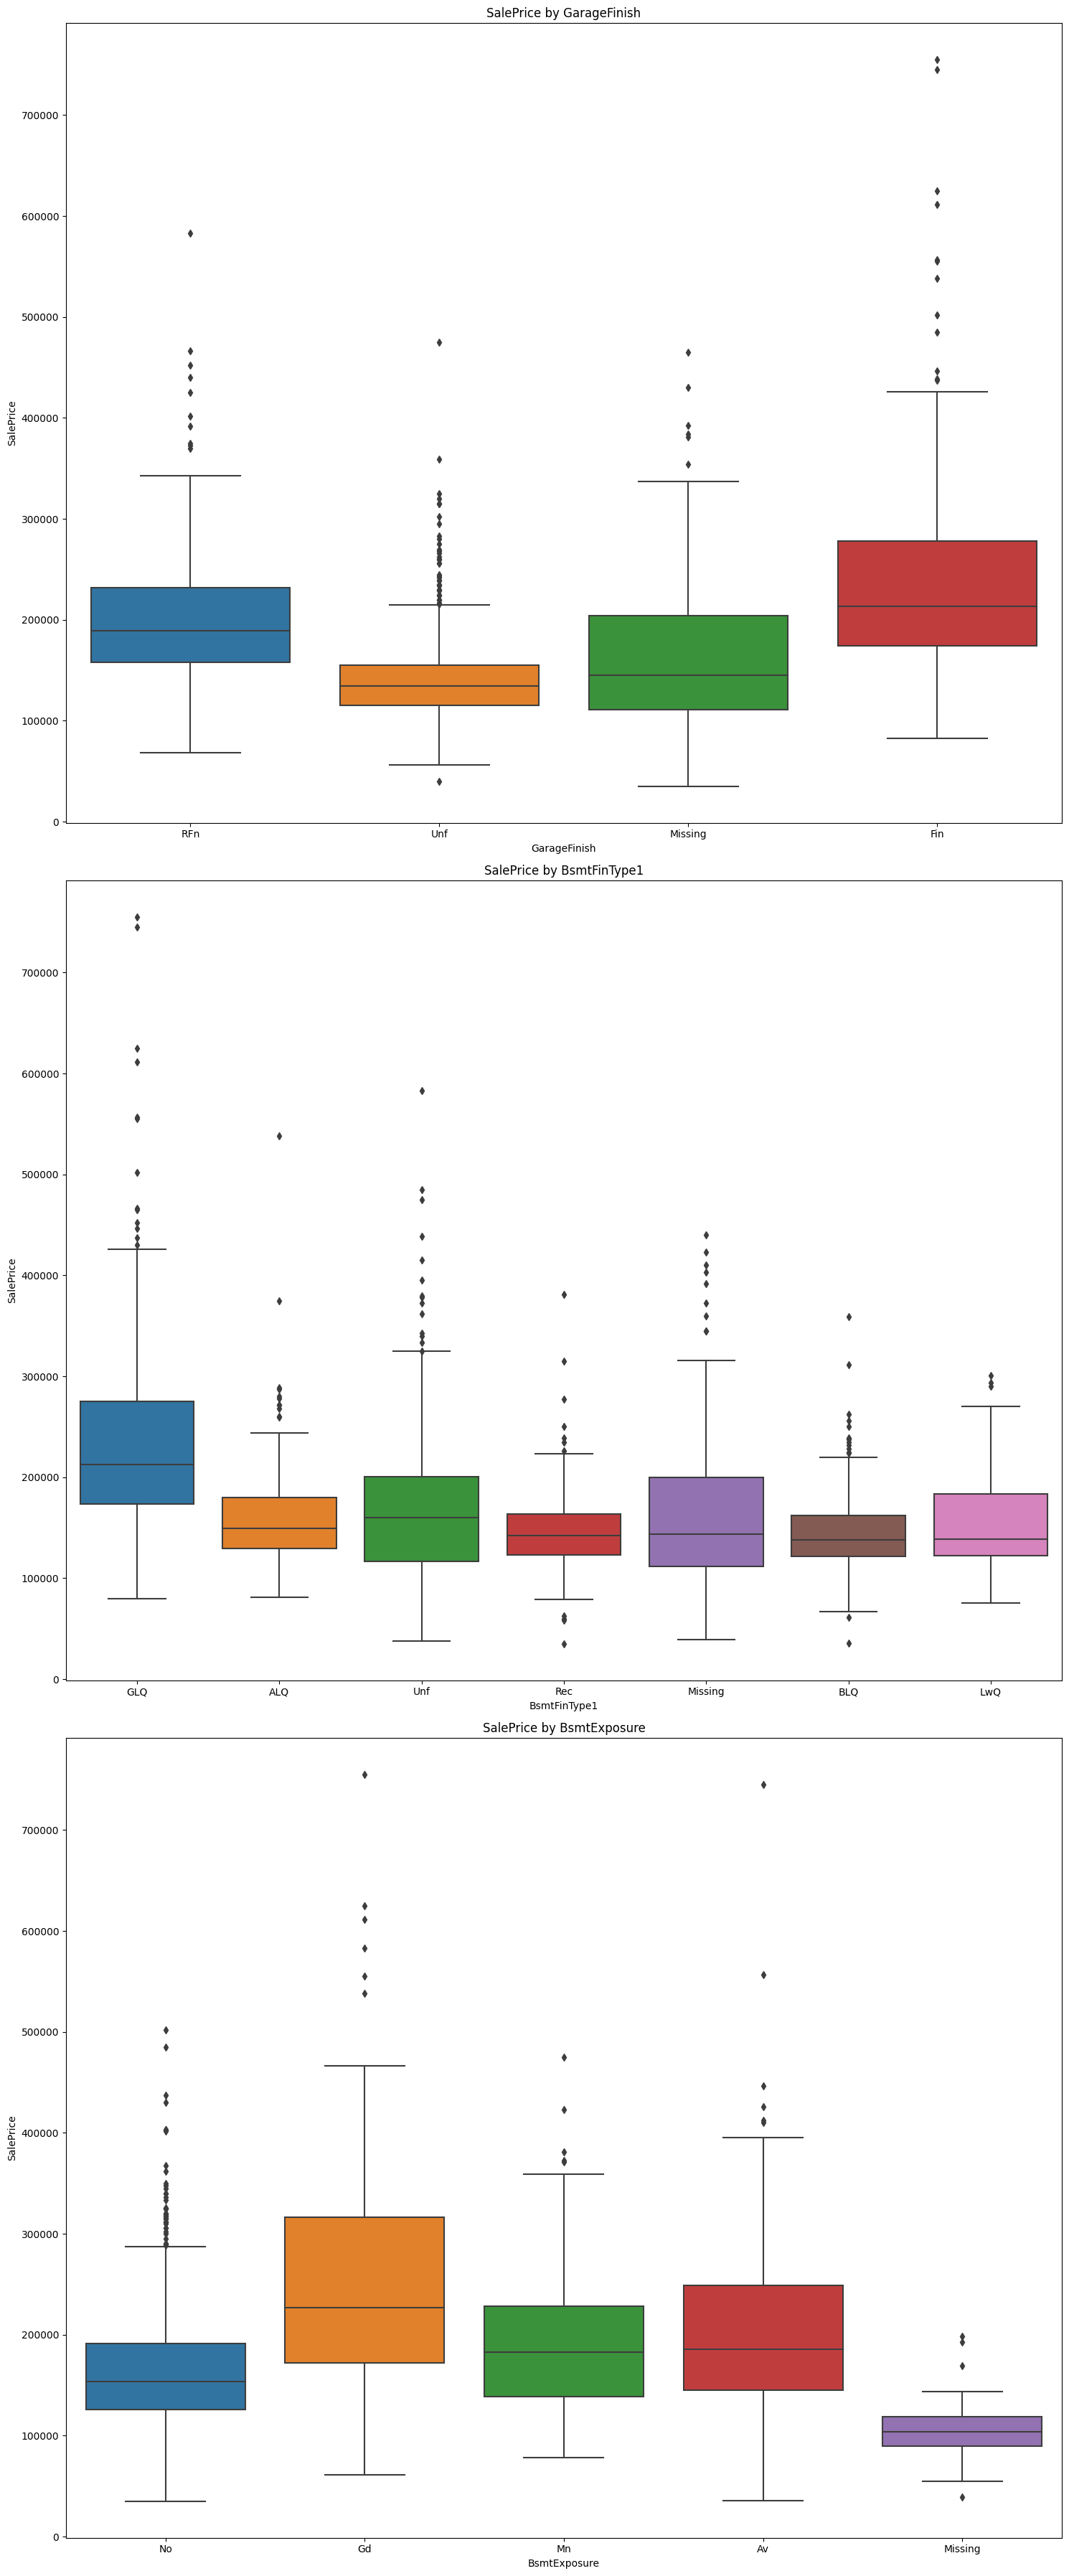

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the relevant columns
df_missing = df.copy()

# Fill missing values with 'Missing'
df_missing['GarageFinish'] = df_missing['GarageFinish'].fillna('Missing')
df_missing['BsmtFinType1'] = df_missing['BsmtFinType1'].fillna('Missing')
df_missing['BsmtExposure'] = df_missing['BsmtExposure'].fillna('Missing')

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 36))

# Plot the data for GarageFinish
sns.boxplot(data=df_missing, x='GarageFinish', y='SalePrice', ax=axes[0])
axes[0].set_title('SalePrice by GarageFinish')

# Plot the data for BsmtFinType1
sns.boxplot(data=df_missing, x='BsmtFinType1', y='SalePrice', ax=axes[1])
axes[1].set_title('SalePrice by BsmtFinType1')

# Plot the data for BsmtExposure
sns.boxplot(data=df_missing, x='BsmtExposure', y='SalePrice', ax=axes[2])
axes[2].set_title('SalePrice by BsmtExposure')

# Display the plots
plt.tight_layout()
plt.show()


* We observe that the "missing" values align closely with "Unf" for both the garage and basement variables. We will take this into account in our future data preparations.
* For BsmtExposure, we observe that the "missing" category is associated with lower values. Consequently, this variable will be handled separately in the upcoming section.

## Investigate basement exposure missing values

* We will make a separate analysis to check the factors given the low values and make sure that we can assign the metadata value of "none" to them which indicates that the property do not have a basement.
* To verify this condition we will compare the number values with 

In [10]:
import pandas as pd

# Assuming df is already defined and contains the relevant columns
df_missing = df.copy()

# Fill missing values with 'Missing'
df_missing['BsmtFinType1'] = df_missing['BsmtFinType1'].fillna('Missing')
df_missing['BsmtExposure'] = df_missing['BsmtExposure'].fillna('Missing')

# Count rows where both BsmtFinType1 and BsmtExposure are 'Missing'
missing_count = df_missing[(df_missing['BsmtFinType1'] == 'Missing') & (df_missing['BsmtExposure'] == 'Missing')].shape[0]

# Print the result
print("Number of properties with 'Missing' for both BsmtFinType1 and BsmtExposure:", missing_count)

Number of properties with 'Missing' for both BsmtFinType1 and BsmtExposure: 37


* Given that the count of missing basement exposure values almost exactly matches the count of missing values for the total basement area (currently 1422 out of an expected 1460), we can confidently deduce that these missing values indicate the absence of a basement. Therefore, we will assign the missing values as "None," indicating no basement.

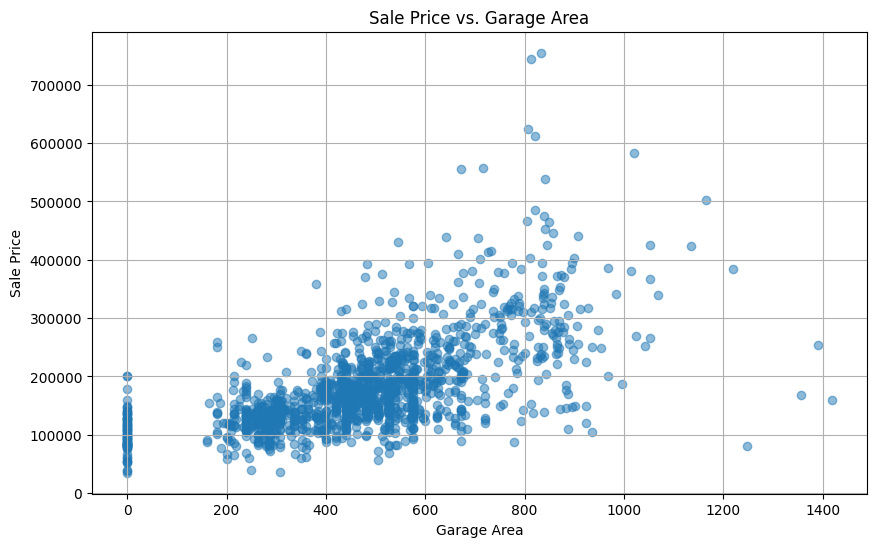

In [32]:
import matplotlib.pyplot as plt

# Filter out rows where GarageArea is missing
df_with_garage = df[df['GarageArea'].notnull()]

# Plot sale price against garage area
plt.figure(figsize=(10, 6))
plt.scatter(df_with_garage['GarageArea'], df_with_garage['SalePrice'], alpha=0.5)
plt.title('Sale Price vs. Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

* We can see that even properties without garage and a small garage is a small difference in price, meaning that small garage seems to be priced in principle as without a garage.

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


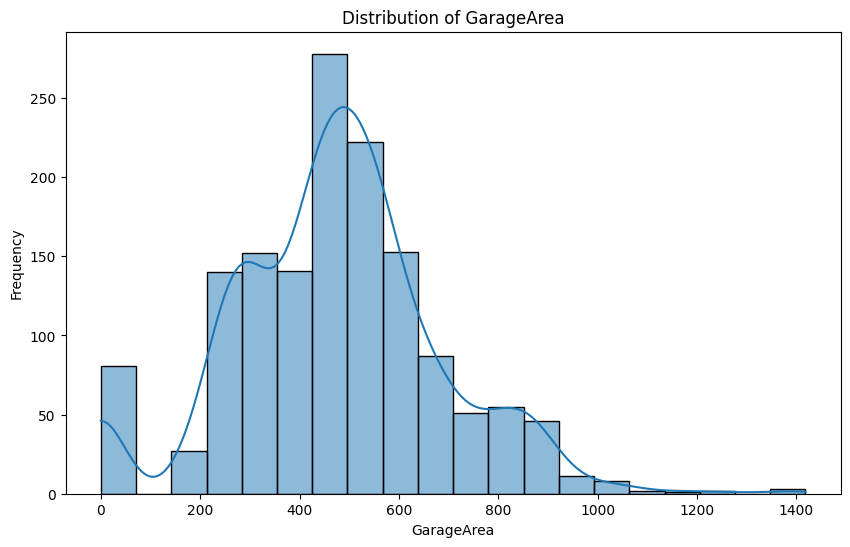

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the relevant columns
df_missing = df.copy()
df_missing['GarageFinish'] = df_missing['GarageFinish'].fillna('Missing')

# Descriptive statistics for GarageArea
garage_area_stats = df_missing['GarageArea'].describe()
print(garage_area_stats)

# Plotting a histogram for GarageArea
plt.figure(figsize=(10, 6))
sns.histplot(df_missing['GarageArea'], bins=20, kde=True)
plt.title('Distribution of GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('Frequency')
plt.show()

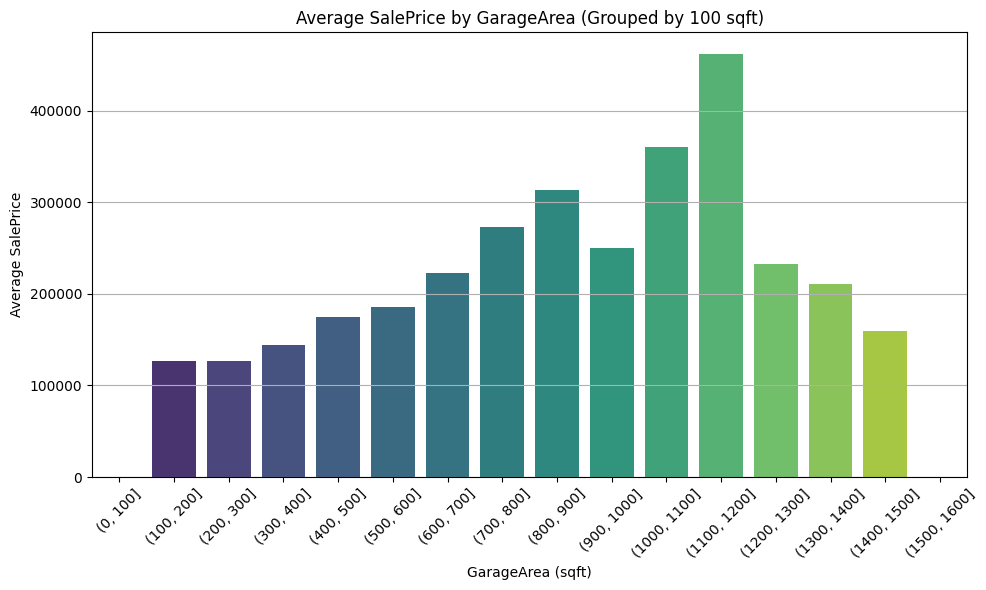

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the relevant columns
df_missing = df.copy()
df_missing['GarageFinish'] = df_missing['GarageFinish'].fillna('Missing')

# Define the bin edges
bin_edges = np.arange(0, 1601, 100)

# Create a new column with GarageArea binned
df_missing['GarageArea_bins'] = pd.cut(df_missing['GarageArea'], bins=bin_edges)

# Calculate the average SalePrice for each bin
bin_price_avg = df_missing.groupby('GarageArea_bins')['SalePrice'].mean()

# Plot the correlation between GarageArea bins and average SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_price_avg.index, y=bin_price_avg.values, palette='viridis')
plt.title('Average SalePrice by GarageArea (Grouped by 100 sqft)')
plt.xlabel('GarageArea (sqft)')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [35]:
# Calculate the mean SalePrice for each bin of GarageArea
bin_price_avg = df_missing.groupby('GarageArea_bins')['SalePrice'].mean()

# Calculate the correlation coefficient between GarageArea bins and average SalePrice
correlation = bin_price_avg.corr(pd.Series(bin_price_avg.index.codes, index=bin_price_avg.index), method='pearson')

print("Correlation between GarageArea (grouped by 100 sqft) and SalePrice:", correlation)

KeyError: 'GarageArea_bins'

Garage initial assessment
Upon initial examination, there is no strong indication that the GarageFinish feature has a significant correlation with the sale price. Additionally, the initial investigation into the relationship between garage area and sale price reveals a relatively low correlation.

Given that the size of the house typically exhibits a strong correlation with sale price, the comparatively weaker correlation observed with garage area suggests that other factors may have a more pronounced influence on the final sale price.

Further analysis is warranted to understand the nuanced relationship between garage attributes and sale price. This may include exploring potential outliers, considering interactions with other features, and employing more advanced analytical techniques to capture non-linear relationships effectively.

By delving deeper into these factors, we can gain a more comprehensive understanding of the garage's impact on property valuation and make more informed decisions regarding its significance in the overall pricing model.

Basement type

IndexError: too many indices for array

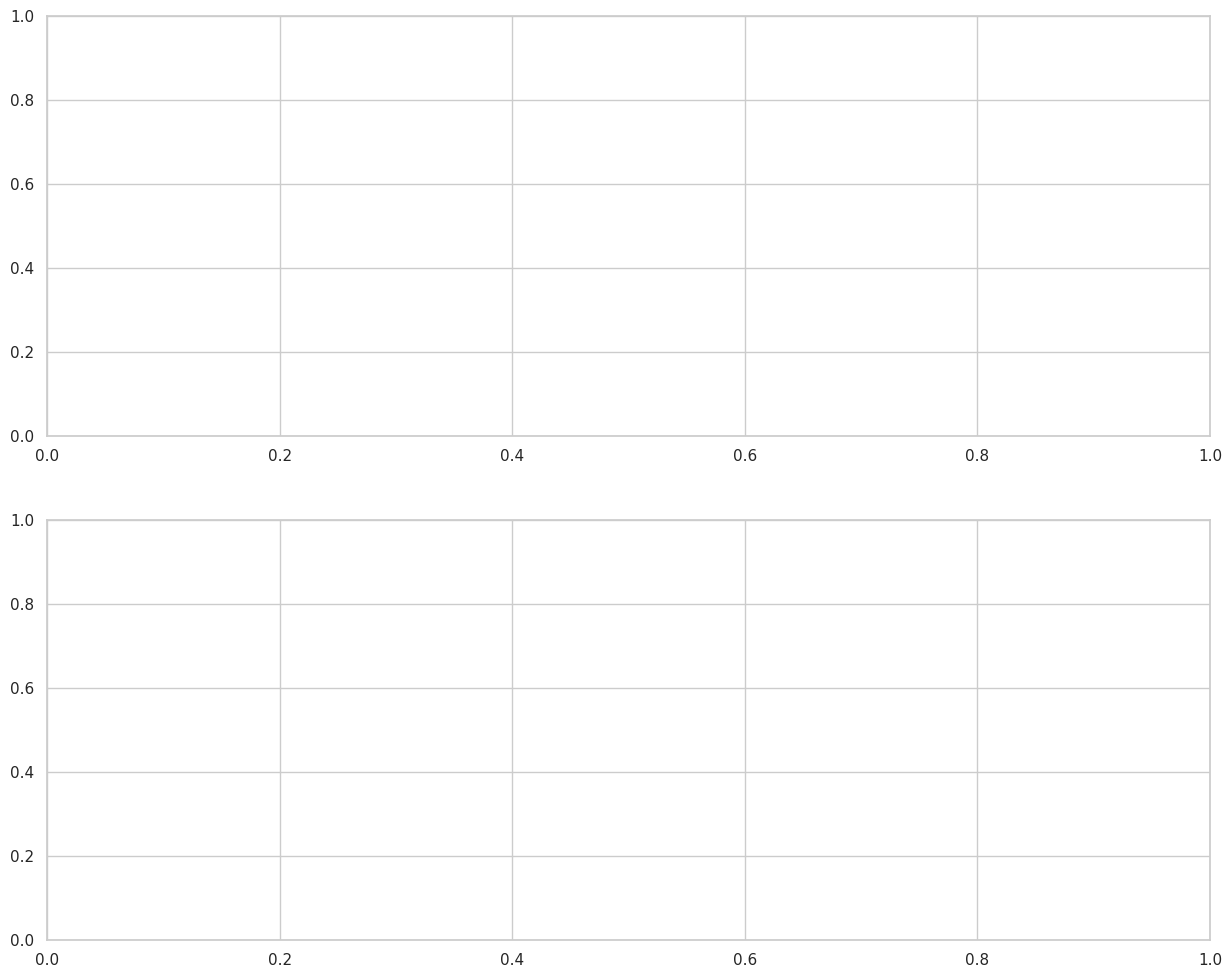

In [36]:
df_missing = df.copy()
df_missing['BsmtExposure']=df_missing['BsmtExposure'].fillna('Missing')
df_missing['BsmtFinType1']=df_missing['BsmtFinType1'].fillna('Missing')


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,12))
sns.boxplot(data=df_missing, x='BsmtExposure', y='SalePrice', ax=axes[0,0])
sns.boxplot(data=df_missing, x='BsmtFinType1', y='SalePrice', ax=axes[1,0])


In our analysis of basement exposure, we observed a noteworthy trend: properties with missing values for basement exposure tend to have lower sale prices. This suggests that the absence of basement exposure data may signal certain property characteristics that contribute to decreased market value.

Moreover, our examination revealed a subtle but discernible impact on sale price attributed to good living quarters within the basement. Properties featuring well-finished living spaces below ground level exhibited a slight positive influence on sale price, indicating a preference among buyers for quality basement amenities.

These findings underscore the importance of considering basement attributes in property valuation, as they can significantly influence market perceptions and ultimately affect sale prices. Further exploration into the nuances of basement features and their impact on property value is warranted to provide deeper insights for real estate decision-making.

Since the the sale prices range is lower and closest to "No" we will impute the missing values with  "No" for future calculations.

There is no clear connection between BsmtFinType and sales price. Since low-quality and average recreation rooms are essentially the same, the finish type has little effect. What can be discerned is that the quality of living quarters is influencing the price; however, this is most likely due to location rather than the finish type.

The sales price tends to increase with newer garages; however, this trend is likely influenced by property characteristics. Outliers were detected between 1993 and 1996, but subsequently, sales prices reverted to lower levels.

In [21]:
import plotly.express as px
fig = px.box(df_missing, x='GarageYrBlt', y='SalePrice')
fig.show()

# Correlation and predictive power score analysis

We will perform a correlation and predictive analysis for the existing raw data. The functions used are from CI predictive analysis second walkthrough project.

Test code for checking pandas behaviour

We use CalculateCorrAndPPS function to calculate Correlations and Predictive Power Score.

# Summary
From the functions checking variables with missing data and the profile report we can see the we have missing data and "zeros" in the dataset, the data has three variables with type object.

# Data cleaning

In the first section we will clean the data, dropping variables where feasible and imputing values in order to normalize data.
In the second section we will assess the effect of cleaning the data.

1. Drop variables.
-  
2. Median imputation
   For 

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

In [22]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [15]:
from feature_engine.selection import DropFeatures

# Verify feature names and correct any discrepancies
variables_method = ['EnclosedPorch', 'WoodDeckSF']
missing_features = [var for var in variables_method if var not in df.columns]

if missing_features:
    print("Error: The following features are missing:", missing_features)
else:
    # Drop specified features
    imputer = DropFeatures(features_to_drop=variables_method)
    df_method = imputer.fit_transform(df)
    print(df_method.head(5))

   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn       2003.0  ...     8450        65.0   
1        284         460          RFn       1976.0  ...     9600        80.0   
2        434         608          RFn       2001.0  ...    11250        68.0   
3        540         642          Unf       1998.0  ...     9550        60.0   
4        490         836          RFn       2000.0  ...    14260        84.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  To

## Categorical imputation


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['GarageFinish', 'BsmtFinType1'] 




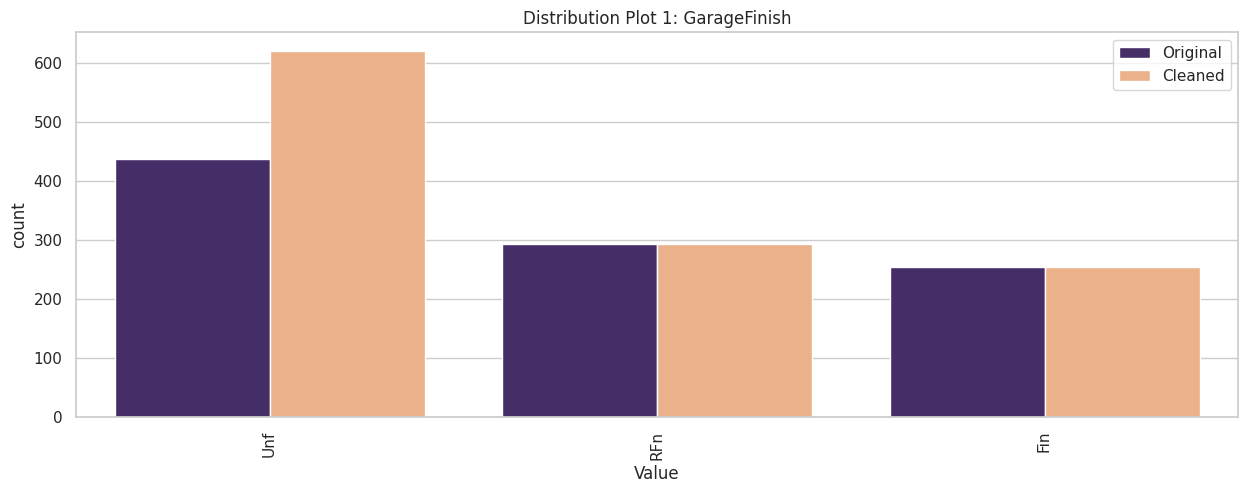

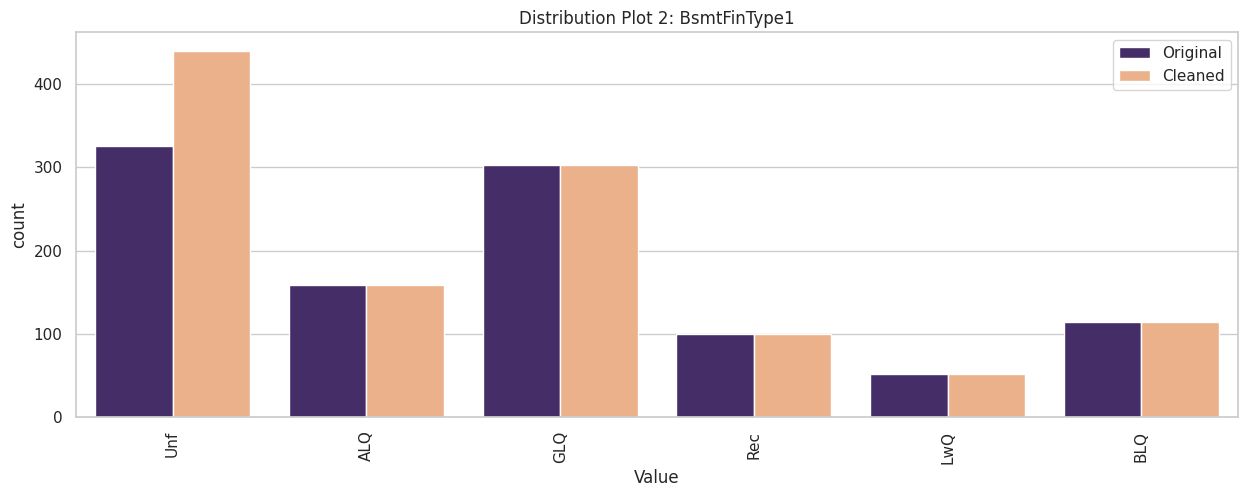

In [23]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['GarageFinish' , 'BsmtFinType1']
imputer = CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=variables_categorical)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_categorical)


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BsmtExposure'] 




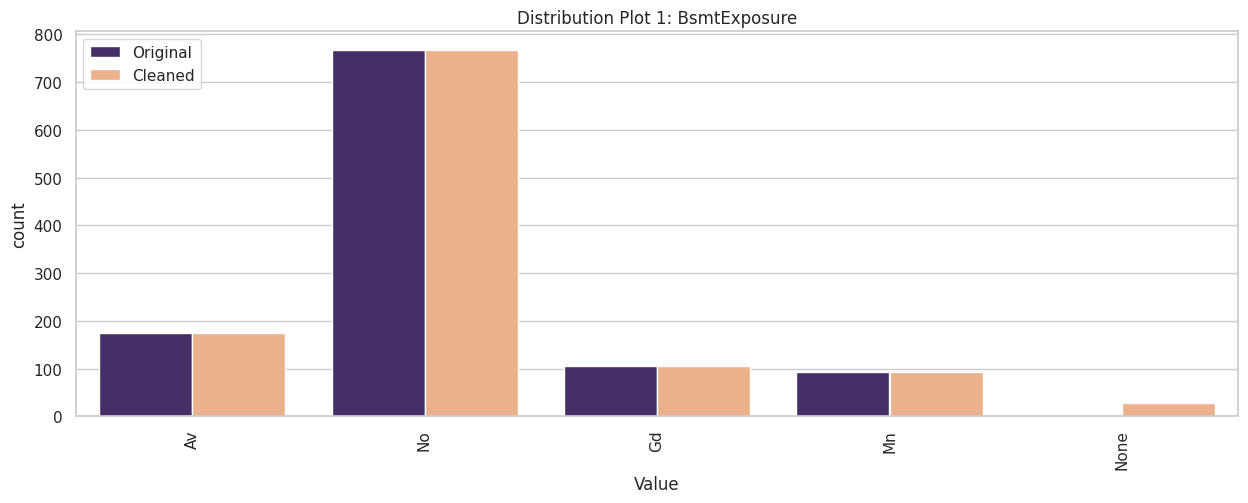

In [24]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['BsmtExposure']
imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=variables_categorical)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_categorical)


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BedroomAbvGr'] 




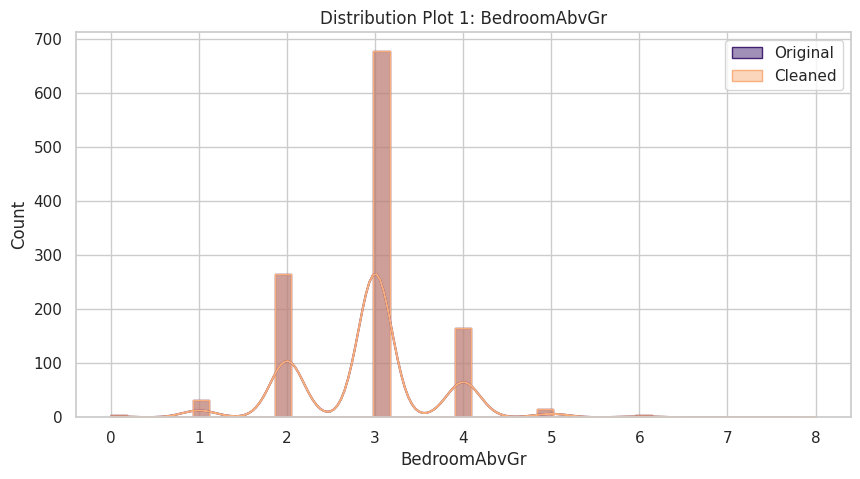

In [45]:
from feature_engine.imputation import MeanMedianImputer

variables_mean = ['BedroomAbvGr']
imputer = MeanMedianImputer(imputation_method='mean', variables=variables_mean)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_mean)

* After running the mean impution it seems like Lot Frontage cleaned data deviates significantly from original data. 
 


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['2ndFlrSF', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage'] 




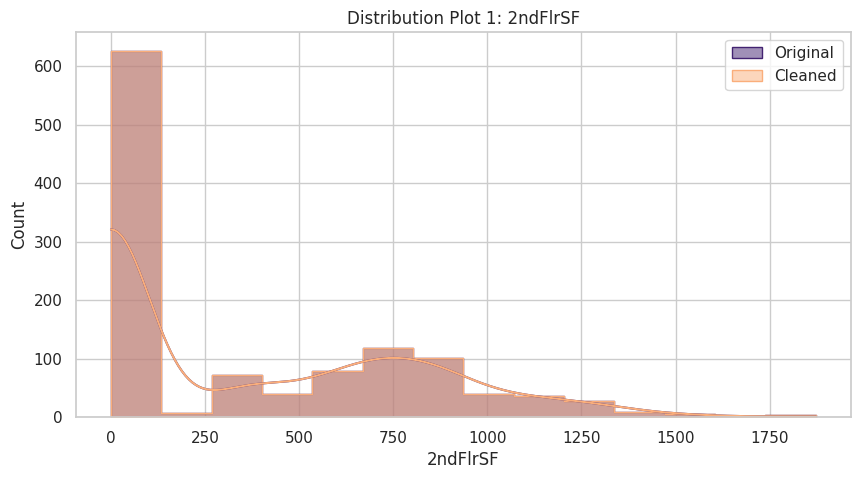

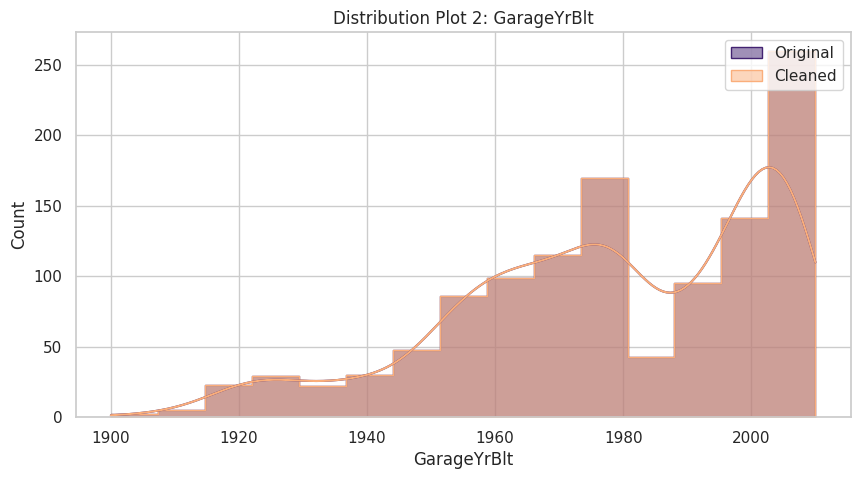

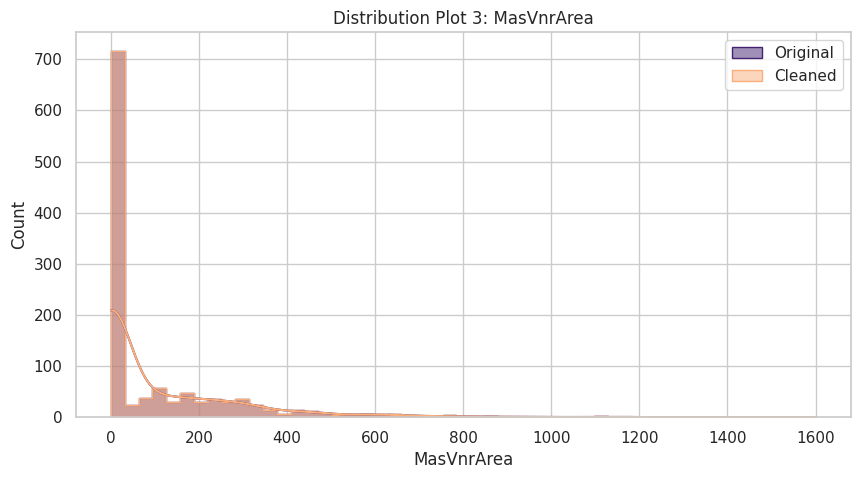

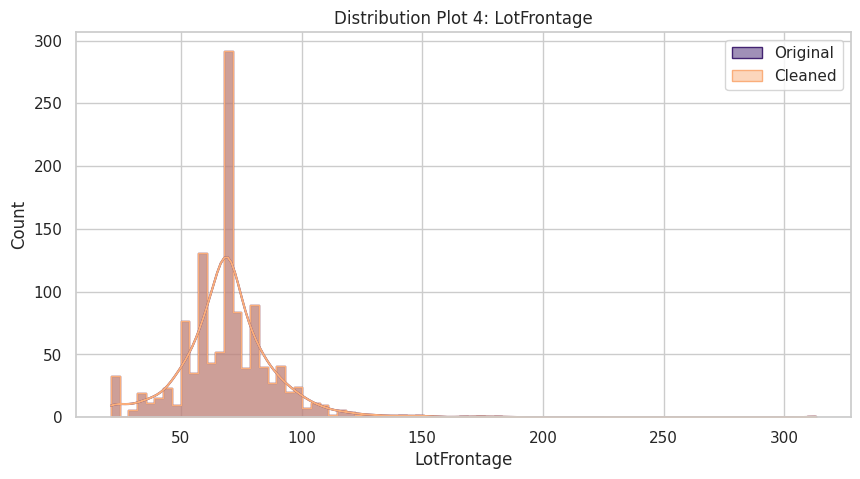

In [46]:
variables_median = ['2ndFlrSF' , 'GarageYrBlt', 'MasVnrArea' , 'LotFrontage']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_median)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_median)

In [47]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def DataCleaningEffect(df_original,df_cleaned,variables_applied_with_method):
  """
  Function to visualize data cleaning effect
  """
  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1

In [42]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


In [43]:
# Drop Variables ['EnclosedPorch', 'WoodDeckSF']
variables_method = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet), imputer.transform(TestSet)

# MeanNumberImputer 
variables_method = ['2ndFlrSF','MasVnrArea']
imputer = MeanMedianImputer(imputation_method='mean', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

# CategoricalImputer (1)
variables_method = ['BsmtFinType1', 'GarageFinish', 'BsmtExposure']
imputer = CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

# CategoricalImputer (2)
variables_method = ['BsmtExposure']
imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

# MeanMedianImputer
variables_method = ['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

In [44]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


---

In [30]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer

data_cleaning_pipeline = Pipeline([
    ('DropFeatures', DropFeatures(features_to_drop=['EnclosedPorch', 'WoodDeckSF'])),
    ('MeanMedianImputer', MeanMedianImputer(imputation_method='median', variables=['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage'])),
    ('CategoricalImputer1', CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=['BsmtFinType1', 'GarageFinish'])),
    ('CategoricalImputer2', CategoricalImputer(imputation_method='missing', fill_value='None', variables=['BsmtExposure'])),
    ('MeanMedianImputer2', MeanMedianImputer(imputation_method='mean', variables=['BedroomAbvGr','LotFrontage'])),
])

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [33]:
import os
try:
  # create here your folder
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

# Save the Train Set
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

# Save the Test Set
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)


[Errno 17] File exists: 'outputs/datasets/cleaned'
